# import

In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.cluster import SpectralClustering
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

# Load Files

<span style="color:red"><strong>MODIFICATION REQUIRED: Load your own dimension reduction result </strong></span>

In [4]:
# Load File
dim_result = pd.read_csv(Path('2k_PCA_result_df.tsv'), sep = '\t', index_col=0).fillna("NaN")

In [5]:
dim_result

,0,1,2,3,4,5
sample_id,,,,,,
TCGA-4P-AA8J-01A-11R-A39I-07,14.183870,0.293588,27.838465,8.144572,11.612816,-6.231887
TCGA-BA-4074-01A-01R-1436-07,31.278080,0.509214,16.682529,-20.420680,-1.295354,9.667981
TCGA-BA-4075-01A-01R-1436-07,24.258461,8.887079,17.920668,-21.336461,-5.916549,9.740114
TCGA-BA-4076-01A-01R-1436-07,5.192250,13.260230,-5.663472,-13.379993,-0.495286,-1.330147
TCGA-BA-4077-01B-01R-1436-07,-5.721013,-0.477351,0.553885,9.984003,-6.183505,-9.771819
...,...,...,...,...,...,...
TCGA-UF-A7JT-01A-11R-A34R-07,17.119354,14.798406,10.616341,8.561534,-8.675739,-1.589032
TCGA-UF-A7JV-01A-11R-A34R-07,4.832855,6.146692,17.117031,-3.718817,-12.693615,-10.826376
TCGA-UP-A6WW-01A-12R-A34R-07,31.219109,-13.439876,1.767226,14.621137,0.072507,-9.669859


# Clustering 

<span style="color:red"><strong>MODIFICATION REQUIRED: scale and process as needed </strong></span>


In [6]:
max_cluster = 10 # max attempted amount of clusters

# Scaling and processing
dim_scaled = StandardScaler().fit_transform(dim_result) # PCA - put all PCs on same scale
# dim_scaled = dim_result.copy() # use this if you don't need to further process your dim red result

# modify this to change the axis label in plots below
axis1 = "PC1"
axis2 = "PC2"

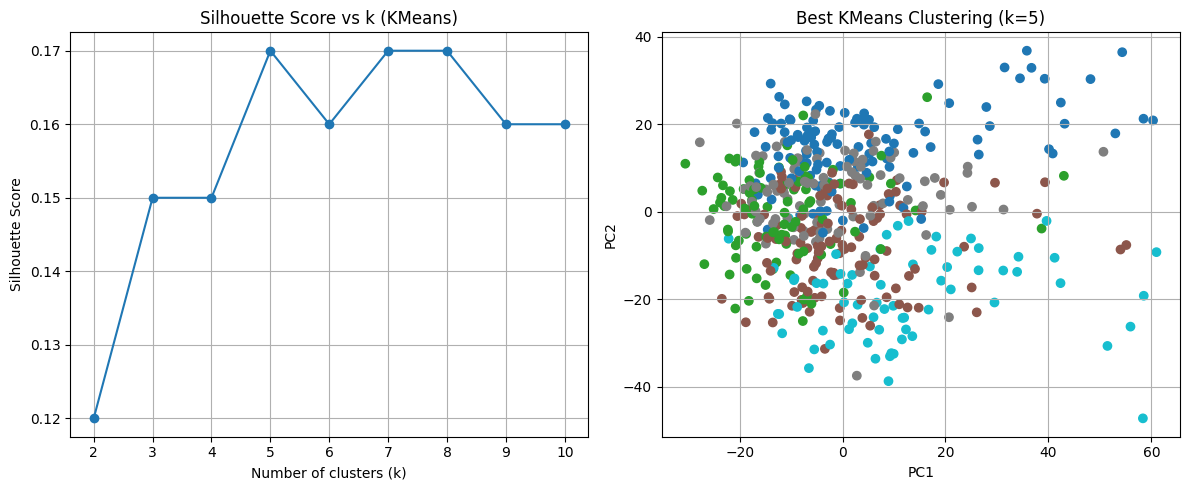

In [7]:
# kmeans
# siloutte score for best cluster dim selection
kmeans_score = []
for k in range(2, max_cluster+1):
    kmeans = KMeans(n_clusters=k, random_state=2)
    labels = kmeans.fit_predict(dim_scaled)
    score = silhouette_score(dim_scaled, labels)
    kmeans_score.append(round(score, 2))
best_k_kmeans = range(2, max_cluster+1)[kmeans_score.index(max(kmeans_score))]
kmeans = KMeans(n_clusters=best_k_kmeans, random_state=2)
labels = kmeans.fit_predict(dim_scaled)
labels_df = pd.DataFrame({
    'sample_id': dim_result.index,
    'kmeans_cluster_label': labels
}).set_index('sample_id')

# plots
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
# silhouette scores
axs[0].plot(range(2, max_cluster + 1), kmeans_score, marker='o')
axs[0].set_xticks(range(2, max_cluster + 1))
axs[0].set_xlabel('Number of clusters (k)')
axs[0].set_ylabel('Silhouette Score')
axs[0].set_title('Silhouette Score vs k (KMeans)')
axs[0].grid(True)
# best clustering result
axs[1].scatter(dim_result.iloc[:, 0], dim_result.iloc[:, 1], c=labels, cmap='tab10')
axs[1].set_title(f'Best KMeans Clustering (k={best_k_kmeans})')
axs[1].set_xlabel(axis1)
axs[1].set_ylabel(axis2)
axs[1].grid(True)
plt.tight_layout()
plt.show()

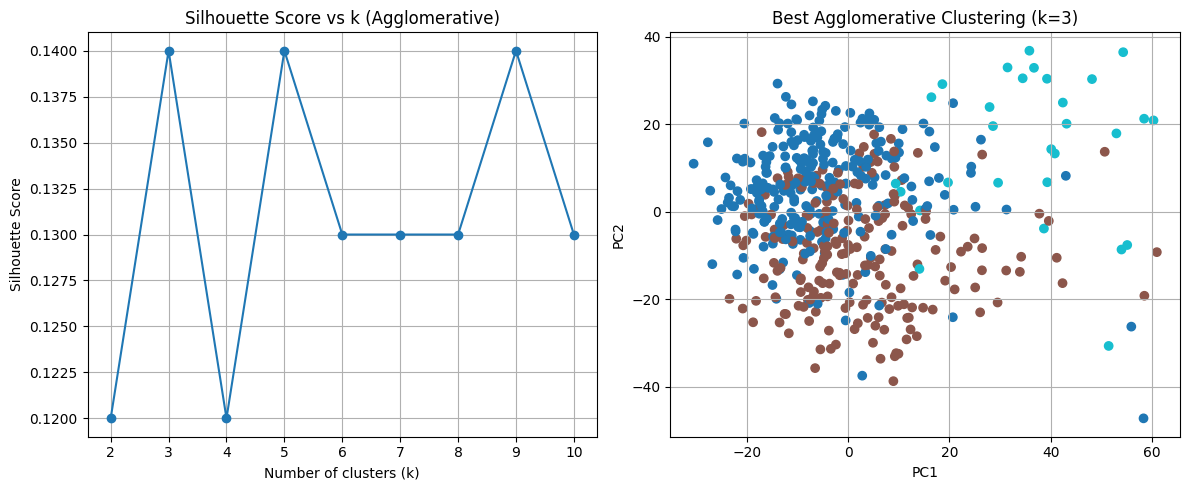

In [8]:
# agglomerative
agg_score = []
for k in range(2, max_cluster + 1):
    agg = AgglomerativeClustering(n_clusters=k)
    labels = agg.fit_predict(dim_scaled)
    score = silhouette_score(dim_scaled, labels)
    agg_score.append(round(score, 2))
best_k_agg = range(2, max_cluster + 1)[agg_score.index(max(agg_score))]
agg = AgglomerativeClustering(n_clusters=best_k_agg)
labels = agg.fit_predict(dim_scaled)
labels_df['agg_cluster_label'] = labels

# plots
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
# silhouette scores
axs[0].plot(range(2, max_cluster + 1), agg_score, marker='o')
axs[0].set_xticks(range(2, max_cluster + 1))
axs[0].set_xlabel('Number of clusters (k)')
axs[0].set_ylabel('Silhouette Score')
axs[0].set_title('Silhouette Score vs k (Agglomerative)')
axs[0].grid(True)
# best clustering result
axs[1].scatter(dim_result.iloc[:, 0], dim_result.iloc[:, 1], c=labels, cmap='tab10')
axs[1].set_title(f'Best Agglomerative Clustering (k={best_k_agg})')
axs[1].set_xlabel(axis1)
axs[1].set_ylabel(axis2)
axs[1].grid(True)

plt.tight_layout()
plt.show()

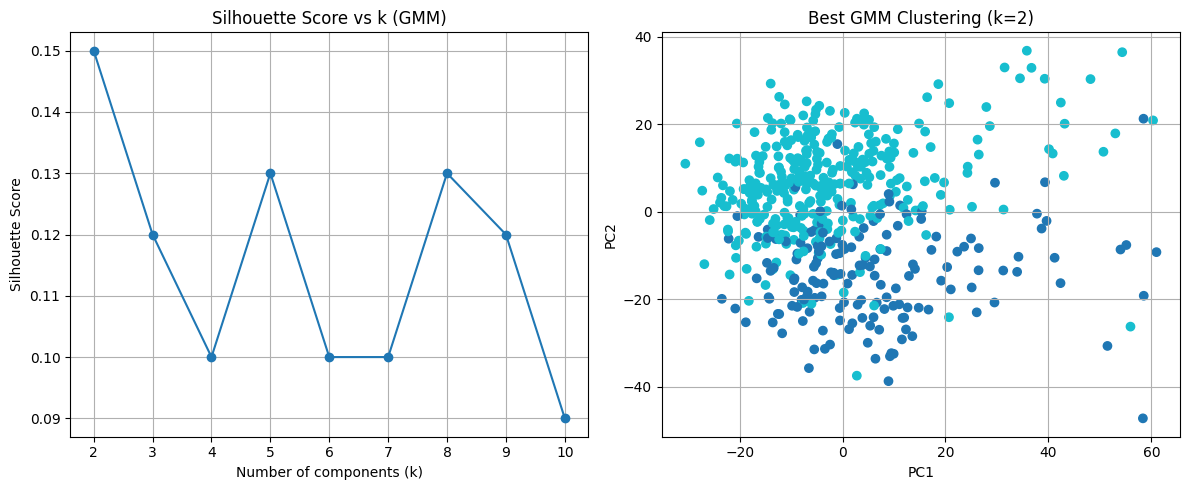

In [9]:
# GMM
gmm_score = []
for k in range(2, max_cluster + 1):
    gmm = GaussianMixture(n_components=k, random_state=1)
    labels = gmm.fit_predict(dim_scaled)
    score = silhouette_score(dim_scaled, labels)
    gmm_score.append(round(score, 2))
best_k_gmm = range(2, max_cluster + 1)[gmm_score.index(max(gmm_score))]
gmm = GaussianMixture(n_components=best_k_gmm, random_state=1)
labels = gmm.fit_predict(dim_scaled)
labels_df['gmm_cluster_label'] = labels

# plot
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
# silhouette scores
axs[0].plot(range(2, max_cluster + 1), gmm_score, marker='o')
axs[0].set_xticks(range(2, max_cluster + 1))
axs[0].set_xlabel('Number of components (k)')
axs[0].set_ylabel('Silhouette Score')
axs[0].set_title('Silhouette Score vs k (GMM)')
axs[0].grid(True)
# best clustering
axs[1].scatter(dim_result.iloc[:, 0], dim_result.iloc[:, 1], c=labels, cmap='tab10')
axs[1].set_title(f'Best GMM Clustering (k={best_k_gmm})')
axs[1].set_xlabel(axis1)
axs[1].set_ylabel(axis2)
axs[1].grid(True)

plt.tight_layout()
plt.show()


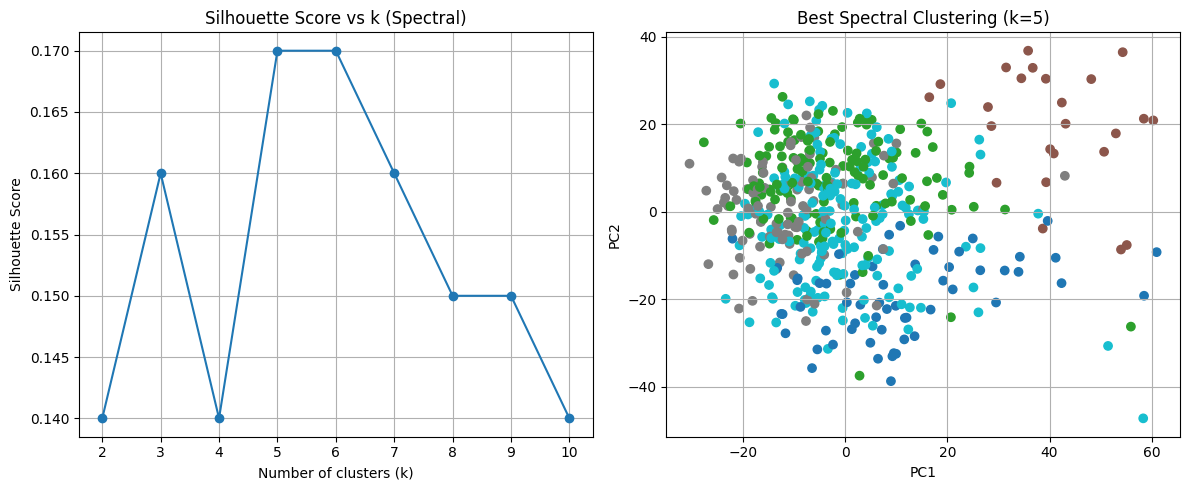

In [10]:
# Spectral Clustering
spectral_score = []
for k in range(2, max_cluster + 1):
    spectral = SpectralClustering(n_clusters=k, assign_labels='kmeans', random_state=1, affinity='nearest_neighbors')
    labels = spectral.fit_predict(dim_scaled)
    score = silhouette_score(dim_scaled, labels)
    spectral_score.append(round(score, 2))
best_k_spectral = range(2, max_cluster + 1)[spectral_score.index(max(spectral_score))]
spectral = SpectralClustering(n_clusters=best_k_spectral, assign_labels='kmeans', random_state=1, affinity='nearest_neighbors')
labels = spectral.fit_predict(dim_scaled)
labels_df['spectral_cluster_label'] = labels

# plot
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
# silhouette scores
axs[0].plot(range(2, max_cluster + 1), spectral_score, marker='o')
axs[0].set_xticks(range(2, max_cluster + 1))
axs[0].set_xlabel('Number of clusters (k)')
axs[0].set_ylabel('Silhouette Score')
axs[0].set_title('Silhouette Score vs k (Spectral)')
axs[0].grid(True)
# best clustering
axs[1].scatter(dim_result.iloc[:, 0], dim_result.iloc[:, 1], c=labels, cmap='tab10')
axs[1].set_title(f'Best Spectral Clustering (k={best_k_spectral})')
axs[1].set_xlabel(axis1)
axs[1].set_ylabel(axis2)
axs[1].grid(True)

plt.tight_layout()
plt.show()


<span style="color:red"><strong>MODIFICATION REQUIRED: identify range of eps to optimize </strong></span>

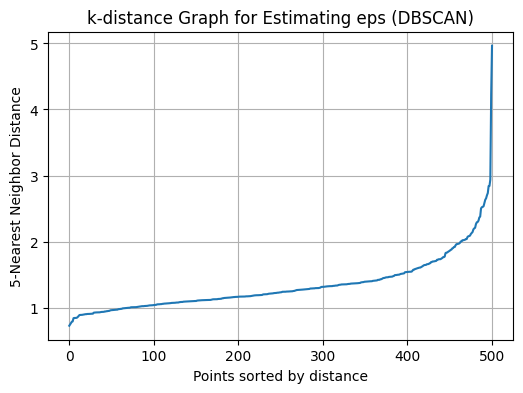

In [11]:
# Set k = min_samples for DBSCAN
k = 5

# Fit nearest neighbors
nbrs = NearestNeighbors(n_neighbors=k + 1).fit(dim_scaled)
distances, indices = nbrs.kneighbors(dim_scaled)

# Use the k-th nearest neighbor distance (last column), excluding the self-distance
k_distances = np.sort(distances[:, -1])

# Plot the sorted distances
plt.figure(figsize=(6, 4))
plt.plot(k_distances)
plt.xlabel('Points sorted by distance')
plt.ylabel(f'{k}-Nearest Neighbor Distance')
plt.title('k-distance Graph for Estimating eps (DBSCAN)')
plt.grid(True)
plt.show()

<span style="color:red"><strong>MODIFICATION REQUIRED: change lower_eps and upper_eps as indicated by graph above </strong></span>

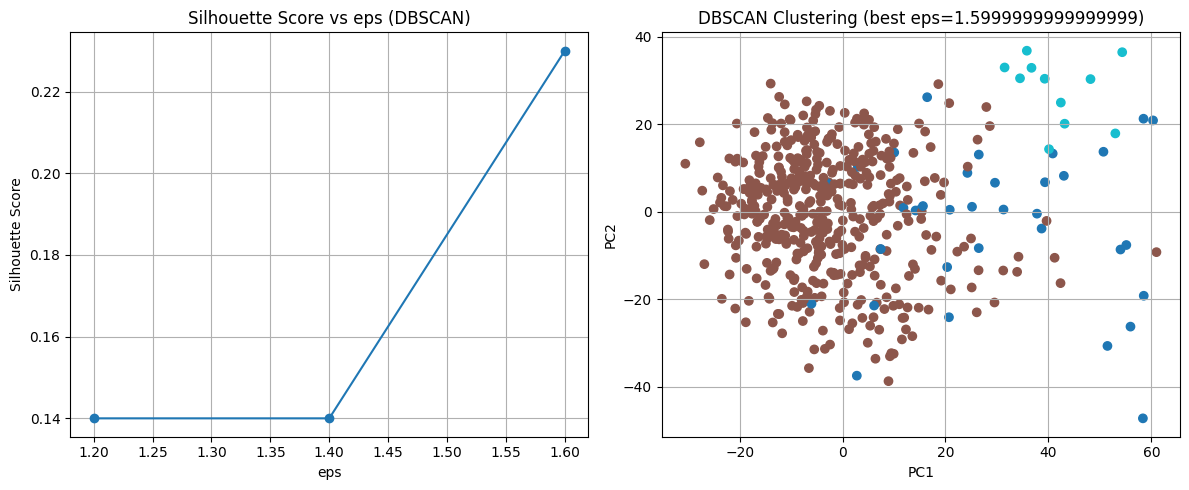

In [12]:
lower_eps = 1.2
upper_eps = 5
eps_values = list(np.arange(lower_eps, upper_eps + 0.01, 0.2))
dbscan_scores = []
for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=5)
    labels = dbscan.fit_predict(dim_scaled)
    # Count valid clusters
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    if n_clusters >= 2:
        score = round(silhouette_score(dim_scaled, labels), 2)
        dbscan_scores.append(score)
    else:
        dbscan_scores.append(np.nan)  # invalid
# Select best eps
valid_scores = [(eps, score) for eps, score in zip(eps_values, dbscan_scores) if not np.isnan(score)]
if valid_scores:
    best_eps, best_score = max(valid_scores, key=lambda x: x[1])
    best_model = DBSCAN(eps=best_eps, min_samples=5)
    best_labels = best_model.fit_predict(dim_scaled)
else:
    best_eps, best_score, best_labels = None, None, None
labels_df['dbscan_cluster_label'] = best_labels

# Plot
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
# silhouette vs eps
axs[0].plot(eps_values, dbscan_scores, marker='o')
axs[0].set_xlabel('eps')
axs[0].set_ylabel('Silhouette Score')
axs[0].set_title('Silhouette Score vs eps (DBSCAN)')
axs[0].grid(True)
# Plot clustering
if best_labels is not None:
    axs[1].scatter(dim_result.iloc[:, 0], dim_result.iloc[:, 1], c=best_labels, cmap='tab10')
    axs[1].set_title(f'DBSCAN Clustering (best eps={best_eps})')
else:
    axs[1].text(0.5, 0.5, "No valid clustering", ha='center', va='center')
axs[1].set_xlabel(axis1)
axs[1].set_ylabel(axis2)
axs[1].grid(True)

plt.tight_layout()
plt.show()

In [ ]:
# run this if package not already installed in local env
# pip install python-igraph leidenalg

In [14]:
# leiden, Harrison Ma's code
def leiden_cluster(X, k=25):
    """
    Create a graph from nearest neighbors and find clusters using Leiden algorithm
    
    Parameters:
    -----------
    X : array-like
        The dimensionality reduced data
    k : int, default=25
        Number of nearest neighbors
        
    Returns:
    --------
    g : igraph.Graph
        The created graph
    partition : leidenalg.VertexPartition
        The partition result from Leiden algorithm
    """
    # Find nearest neighbors
    neighbors = NearestNeighbors(n_neighbors=k).fit(X)
    distances, indices = neighbors.kneighbors(X)

    # Build edge list with weighted edges
    edges = []
    weights = []
    num_points = X.shape[0]

    for i in range(num_points):
        for idx, j in enumerate(indices[i]):
            if i == j: 
                continue
            if (j, i) in edges:
                continue
            d = distances[i, idx]
            weight = math.exp(-d)
            edges.append((i, j))
            weights.append(weight)

    # Create an igraph Graph, add vertices and edges
    g = ig.Graph()
    g.add_vertices(num_points)
    g.add_edges(edges)

    # Set the edge attribute 'weight' for our weighted graph
    g.es['weight'] = weights

    # Find partition using Leiden algorithm
    partition = leidenalg.find_partition(g, leidenalg.ModularityVertexPartition)
    print("Clusters:", partition)
    
    return g, partition

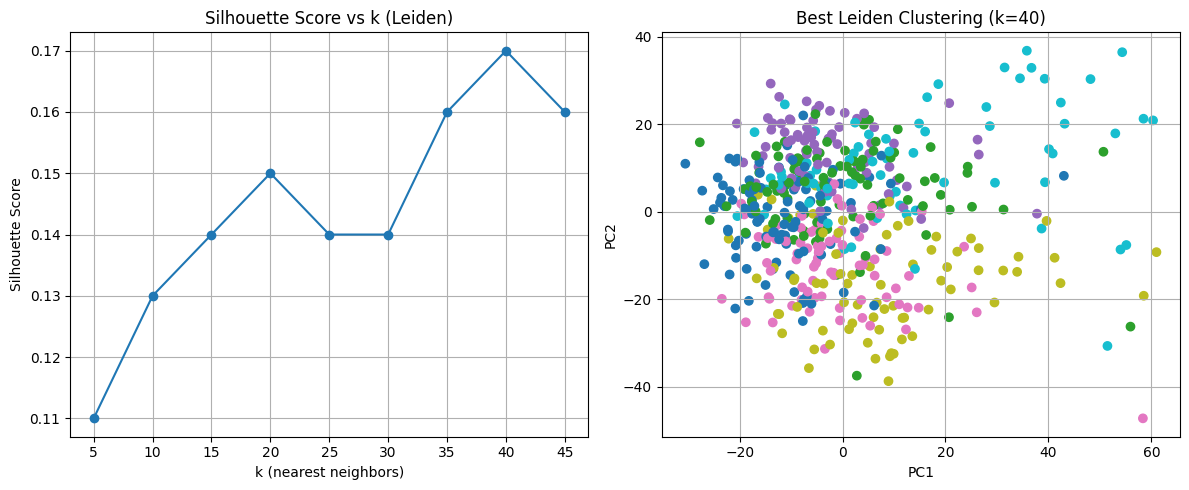

In [23]:
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors
import igraph as ig
import leidenalg
import math
import numpy as np

leiden_scores = []
leiden_labels_dict = {}
k_values = list(range(5, 50, 5))

for k in k_values:
    
    # Leiden clustering
    neighbors = NearestNeighbors(n_neighbors=k).fit(dim_scaled)
    distances, indices = neighbors.kneighbors(dim_scaled)

    edges = []
    weights = []
    num_points = dim_scaled.shape[0]

    for i in range(num_points):
        for idx, j in enumerate(indices[i]):
            if i == j or (j, i) in edges:
                continue
            d = distances[i, idx]
            weight = math.exp(-d)
            edges.append((i, j))
            weights.append(weight)

    g = ig.Graph()
    g.add_vertices(num_points)
    g.add_edges(edges)
    g.es['weight'] = weights

    partition = leidenalg.find_partition(g, leidenalg.ModularityVertexPartition)
    labels = np.array(partition.membership)
    leiden_labels_dict[k] = labels

    # Silhouette score
    if len(set(labels)) > 1:
        score = silhouette_score(dim_scaled, labels)
    else:
        score = -1
    leiden_scores.append(round(score, 2))

# Select best k
best_k_leiden = k_values[leiden_scores.index(max(leiden_scores))]
best_labels = leiden_labels_dict[best_k_leiden]
labels_df['leiden_cluster_label'] = best_labels
labels_df['leiden_cluster_label'] = best_labels

# Plot
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
# silhouette scores
axs[0].plot(k_values, leiden_scores, marker='o')
axs[0].set_xticks(k_values)
axs[0].set_xlabel('k (nearest neighbors)')
axs[0].set_ylabel('Silhouette Score')
axs[0].set_title('Silhouette Score vs k (Leiden)')
axs[0].grid(True)

# best clustering
axs[1].scatter(dim_result.iloc[:, 0], dim_result.iloc[:, 1], c=best_labels, cmap='tab10')
axs[1].set_title(f'Best Leiden Clustering (k={best_k_leiden})')
axs[1].set_xlabel(axis1)
axs[1].set_ylabel(axis2)
axs[1].grid(True)

plt.tight_layout()
plt.show()


# Summary

In [24]:
best_scores = {
    'KMeans': max(kmeans_score),
    'Agglomerative': max(agg_score),
    'GMM': max(gmm_score),
    'Spectral': max(spectral_score),
    'DBSCAN': best_score,  # assuming you already defined best_score
    'Leiden': max(leiden_scores)
}
summary_df = pd.DataFrame([best_scores], index=['highest_silhouette'])
best_method = summary_df.loc['highest_silhouette'].idxmax()
print(f"Best method by silhouette score: {best_method}")
summary_df

Best method by silhouette score: DBSCAN


,KMeans,Agglomerative,GMM,Spectral,DBSCAN,Leiden
highest_silhouette,0.17,0.14,0.15,0.17,0.23,0.17


In [25]:
labels_df

,kmeans_cluster_label,agg_cluster_label,gmm_cluster_label,spectral_cluster_label,dbscan_cluster_label,leiden_cluster_label
sample_id,,,,,,
TCGA-4P-AA8J-01A-11R-A39I-07,1,2,1,4,-1,5
TCGA-BA-4074-01A-01R-1436-07,3,0,1,1,-1,1
TCGA-BA-4075-01A-01R-1436-07,3,0,1,1,-1,1
TCGA-BA-4076-01A-01R-1436-07,0,1,1,4,0,2
TCGA-BA-4077-01B-01R-1436-07,0,0,1,1,0,4
...,...,...,...,...,...,...
TCGA-UF-A7JT-01A-11R-A34R-07,0,0,1,1,0,1
TCGA-UF-A7JV-01A-11R-A34R-07,3,0,1,1,0,1
TCGA-UP-A6WW-01A-12R-A34R-07,4,1,0,0,0,4


In [26]:
summary_df.to_csv("1k_PCA_clustering_result_df.tsv", sep="\t", index=True)
labels_df.to_csv("1k_PCA_clustering_labels_df.tsv", sep="\t", index=True)